In [105]:
import pandas as pd
import numpy as np
import os
import math
import re
import matplotlib.pyplot as plt

In [57]:
data = pd.read_excel('../data/raw/nyc_benchmarking_disclosure_2017_consumption_data.xlsx', sheet_name='Information and Metrics')

In [58]:
# uniforming names of the columns
data_columns =[col.lower().replace(' ', '_').replace('²', '') for col in data.columns]
data.columns = data_columns

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34355 entries, 0 to 34354
Data columns (total 60 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   order                                                      34355 non-null  int64         
 1   property_id                                                34355 non-null  int64         
 2   property_name                                              34355 non-null  object        
 3   parent_property_id                                         1723 non-null   object        
 4   parent_property_name                                       1723 non-null   object        
 5   bbl_-_10_digits                                            33625 non-null  float64       
 6   nyc_borough,_block_and_lot_(bbl)_self-reported             33626 non-null  object        
 7   nyc_building_identification_num

In [60]:
# drop colums if they contain more than 70% NAs and rows with NA target variable
data_cleaned = data.dropna(thresh=int(0.7*len(data)),axis=1)
data_cleaned.dropna(subset=['energy_star_score'], inplace=True)

/tmp/ipykernel_8772/2870552360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.dropna(subset=['energy_star_score'], inplace=True)


In [61]:
for col in data_cleaned.columns:
    if len(data_cleaned[col].unique())==1:
        print(f'One Value {col}-{data_cleaned[col].unique()}')

One Value street_number-['Not found']
One Value street_name-['Not found']
One Value dof_gross_floor_area_(ft)-['Not found']
One Value water_required?-['Not found']
One Value dof_benchmarking_submission_status-['Not found']


In [62]:
# Columns 'bbl_-_10_digits', 'nyc_borough,_block_and_lot_(bbl)_self-reported are almost the same, right?
def bbl(x):
    if type(x) == int:
        return x
    elif type(x) == float and math.isnan(x):
        return x
    else:
        return int(re.sub(r"\D","", x))
    
data_cleaned[data_cleaned['bbl_-_10_digits']!=data_cleaned['nyc_borough,_block_and_lot_(bbl)_self-reported'].apply(bbl)]

,order,property_id,property_name,bbl_-_10_digits,"nyc_borough,_block_and_lot_(bbl)_self-reported",nyc_building_identification_number_(bin),address_1_(self-reported),postal_code,street_number,street_name,...,weather_normalized_site_natural_gas_use_(therms),electricity_use_-_grid_purchase_(kbtu),electricity_use_-_grid_purchase_(kwh),weather_normalized_site_electricity_(kwh),total_ghg_emissions_(metric_tons_co2e),direct_ghg_emissions_(metric_tons_co2e),indirect_ghg_emissions_(metric_tons_co2e),water_required?,generation_date,dof_benchmarking_submission_status
39,42,6143730,Jay Cee of New York Corp.,NaN,NaN,NaN,35 WEST 31ST STREET,10001,Not found,Not found,...,NaN,870169.5,255032.1,NaN,160.7,83.5,77.1,Not found,2018-02-20,Not found
40,43,6143720,New York Midtown Corp,NaN,NaN,NaN,222 West 37th Street,10018,Not found,Not found,...,NaN,NaN,NaN,NaN,185.7,77.8,NaN,Not found,2018-02-20,Not found
48,51,6182209,Staples,NaN,NaN,NaN,24-41 31st St,11102,Not found,Not found,...,1642.9,1051476.0,308170.0,305505.5,101.0,7.7,93.2,Not found,2018-02-21,Not found
163,168,6168561,South Bronx Charter School,2.025460e+09,25460027,NaN,164 Bruckner Blvd,10454,Not found,Not found,...,77814.1,2422656.4,710039.9,724986.0,580.3,365.5,214.8,Not found,2018-03-09,Not found
165,170,6153751,8201 Associates,NaN,NaN,NaN,8201 Bay Parkway,11724,Not found,Not found,...,360.4,85664.2,25106.7,25969.8,15.5,1.8,13.7,Not found,2018-03-09,Not found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34084,34416,6705801,360 Neptune,NaN,NaN,3424564,350 Neptune Ave,11235,Not found,Not found,...,NaN,1621291.2,475173.2,475173.2,137.3,0.0,137.3,Not found,2019-02-27,Not found
34333,34665,6700794,OAR FAILE LLC,2.027630e+09,2-002763-00215,2006551,770 Faile St.,10474,Not found,Not found,...,43260.2,909215.2,266475.7,264941.1,294.2,217.2,77.0,Not found,2019-02-27,Not found
34335,34667,6700864,1661 St johns LLc,3.014700e+09,3-001470-0080,3039446,1661 St johns Pl,11233,Not found,Not found,...,NaN,517823.8,151765.5,150904.6,43.9,0.0,43.9,Not found,2019-02-27,Not found
34336,34668,6700879,1677 St johns LLC,3.014700e+09,3-001470-0060,3039445,1677 St Johns Pl,11233,Not found,Not found,...,NaN,406278.4,119073.4,118636.7,34.4,0.0,34.4,Not found,2019-02-27,Not found


In [63]:
# For BBL Borough Block Lot, is an identification code for buildings across the city used by the Planning department
# we look at the duplicates (since it is an identifier of a building).
# We have the following percentage of unique buildings
len(data_cleaned.drop_duplicates(subset=['bbl_-_10_digits']))/len(data_cleaned.dropna(subset=['bbl_-_10_digits']))

0.674045954045954

In [64]:
data_cleaned.drop_duplicates(subset=['bbl_-_10_digits'], keep='last', inplace=True)

/tmp/ipykernel_8772/3672429206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop_duplicates(subset=['bbl_-_10_digits'], keep='last', inplace=True)


In [65]:
# drop 'nyc_building_identification_number_(bin)' since it is an identifier as well, this is indicated by
len(data_cleaned['nyc_building_identification_number_(bin)'].unique())/len(data_cleaned)

0.982629831633863

* Dropping <code> property_id, order, property_name </code> since they are not informative for prediction
* Dropping <code>dof_gross_floor_area_(ft),  water_required?, dof_benchmarking_submission_status </code>, since they only
 contain one value. 
* <code>street_number</code> and <code>stret_name</code> will be filled up later 
* <code>nyc_borough,_block_and_lot_(bbl)_self-reported</code> will be skipped since it repeats <code>bbl_-_10_digits</code>, the last will delete as well since it is an id.
* <code> nyc_building_identification_number_(bin)</code> will be deleted as it is and identifier.
* <code>generation_date</code> will be removed since it does not bring any information.


In [67]:
columns_to_drop = ['order', 
                   'property_id', 
                   'property_name', 
                   'dof_gross_floor_area_(ft)', 
                   'dof_benchmarking_submission_status',
                   'water_required?',
                   'nyc_borough,_block_and_lot_(bbl)_self-reported',
                   'bbl_-_10_digits',
                   'nyc_building_identification_number_(bin)',
                   'generation_date']
data_cleaned.drop(columns=columns_to_drop, inplace=True)

/tmp/ipykernel_8772/4122568039.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(columns=columns_to_drop, inplace=True)


In [68]:
print(f'We have removed {set(data.columns)-set(data_cleaned.columns)}')

We have removed {'3rd_largest_property_use_type', 'order', 'parent_property_id', 'dof_gross_floor_area_(ft)', 'nyc_building_identification_number_(bin)', 'district_chilled_water_use_(kbtu)', 'district_hot_water_use_(kbtu)', 'property_name', 'district_steam_use_(kbtu)', 'annual_maximum_demand_(mm/yyyy)', 'fuel_oil_#2_use_(kbtu)', '2nd_largest_property_use_-_gross_floor_area_(ft)', 'generation_date', 'metered_areas__(water)', 'parent_property_name', 'annual_maximum_demand_(kw)', 'water_use_(all_water_sources)_(kgal)', 'water_required?', 'nyc_borough,_block_and_lot_(bbl)_self-reported', '3rd_largest_property_use_type_-_gross_floor_area_(ft)', 'property_id', 'bbl_-_10_digits', '2nd_largest_property_use_type', 'fuel_oil_#1_use_(kbtu)', 'dof_benchmarking_submission_status', 'water_use_intensity_(all_water_sources)_(gal/ft)', 'address_2_(self-reported)', 'fuel_oil_#4_use_(kbtu)', 'fuel_oil_#5_&_6_use_(kbtu)', 'diesel_#2_use_(kbtu)', 'propane_use_(kbtu)'}


In [69]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16868 entries, 0 to 34353
Data columns (total 29 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   address_1_(self-reported)                                  16868 non-null  object 
 1   postal_code                                                16868 non-null  object 
 2   street_number                                              16868 non-null  object 
 3   street_name                                                16868 non-null  object 
 4   borough                                                    16868 non-null  object 
 5   self-reported_gross_floor_area_(ft)                        16868 non-null  int64  
 6   primary_property_type_-_self_selected                      16868 non-null  object 
 7   list_of_all_property_use_types_at_property                 16868 non-null  object 
 8   largest_pro

## Separating columns into categorical and numerical

#### Numerical

In [76]:
from numpy import dtype
numerical_columns = []

for col in data_cleaned.columns:
    if data_cleaned[col].dtype == dtype('float64'):
        numerical_columns.append(col)

In [77]:
numerical_columns

['largest_property_use_type_-_gross_floor_area_(ft)',
 'energy_star_score',
 'source_eui_(kbtu/ft)',
 'weather_normalized_source_eui_(kbtu/ft)',
 'site_eui_(kbtu/ft)',
 'weather_normalized_site_eui_(kbtu/ft)',
 'weather_normalized_site_electricity_intensity_(kwh/ft)',
 'weather_normalized_site_natural_gas_intensity_(therms/ft)',
 'natural_gas_use_(kbtu)',
 'weather_normalized_site_natural_gas_use_(therms)',
 'electricity_use_-_grid_purchase_(kbtu)',
 'electricity_use_-_grid_purchase_(kwh)',
 'weather_normalized_site_electricity_(kwh)',
 'total_ghg_emissions_(metric_tons_co2e)',
 'direct_ghg_emissions_(metric_tons_co2e)',
 'indirect_ghg_emissions_(metric_tons_co2e)']

Should we put any of the columns year_built, number_of_buildings, occupancy, self-reported_gross_floor_area_(ft)
to numerical columns?

In [79]:
#year_build is not informative, lets define an age.
data_cleaned['age'] = 2023 - data_cleaned['year_built']
data_cleaned.drop(columns=['year_built'], inplace=True)
numerical_columns.append('age')

/tmp/ipykernel_8772/1421093751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['age'] = 2023 - data_cleaned['year_built']
/tmp/ipykernel_8772/1421093751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(columns=['year_built'], inplace=True)


<Axes: >

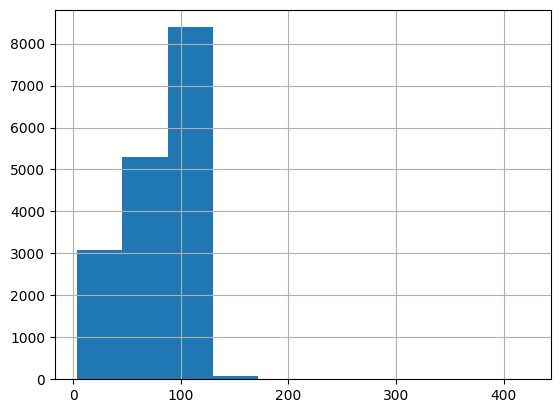

In [88]:
data_cleaned.age.hist()

In [87]:
data_cleaned['number_of_buildings'].value_counts()
# number of buildings will be sent at first to categorical

number_of_buildings
1      16304
2        224
3         86
0         54
4         37
7         21
5         19
6         17
8         14
10        14
12        12
11         6
14         5
9          4
19         4
35         3
16         2
30         2
24         2
15         2
21         2
33         2
22         2
26         2
32         2
52         2
45         2
43         1
60         1
25         1
49         1
13         1
18         1
38         1
23         1
28         1
17         1
155        1
126        1
62         1
150        1
102        1
98         1
68         1
83         1
107        1
161        1
84         1
56         1
Name: count, dtype: int64

In [91]:
data_cleaned.occupancy.value_counts()
# occupancy should be sent to cateogrical

occupancy
100    15431
95       761
90       381
80        86
85        74
70        28
75        27
0         23
50        14
60         9
65         7
10         6
25         6
40         4
30         3
55         3
45         2
5          1
20         1
35         1
Name: count, dtype: int64

In [95]:
len(data_cleaned['self-reported_gross_floor_area_(ft)'].unique())/len(data_cleaned)

0.758655442257529

In [97]:
data_cleaned['self-reported_gross_floor_area_(ft)'].describe()

count    1.686800e+04
mean     1.225414e+05
std      2.080336e+05
min      2.350000e+03
25%      4.542300e+04
50%      7.055550e+04
75%      1.210300e+05
max      8.942176e+06
Name: self-reported_gross_floor_area_(ft), dtype: float64

In [98]:
numerical_columns.append('self-reported_gross_floor_area_(ft)')

In [99]:
print(numerical_columns)

['largest_property_use_type_-_gross_floor_area_(ft)', 'energy_star_score', 'source_eui_(kbtu/ft)', 'weather_normalized_source_eui_(kbtu/ft)', 'site_eui_(kbtu/ft)', 'weather_normalized_site_eui_(kbtu/ft)', 'weather_normalized_site_electricity_intensity_(kwh/ft)', 'weather_normalized_site_natural_gas_intensity_(therms/ft)', 'natural_gas_use_(kbtu)', 'weather_normalized_site_natural_gas_use_(therms)', 'electricity_use_-_grid_purchase_(kbtu)', 'electricity_use_-_grid_purchase_(kwh)', 'weather_normalized_site_electricity_(kwh)', 'total_ghg_emissions_(metric_tons_co2e)', 'direct_ghg_emissions_(metric_tons_co2e)', 'indirect_ghg_emissions_(metric_tons_co2e)', 'age', 'self-reported_gross_floor_area_(ft)']


In [109]:
data_cleaned[numerical_columns].describe()

,largest_property_use_type_-_gross_floor_area_(ft),energy_star_score,source_eui_(kbtu/ft),weather_normalized_source_eui_(kbtu/ft),site_eui_(kbtu/ft),weather_normalized_site_eui_(kbtu/ft),weather_normalized_site_electricity_intensity_(kwh/ft),weather_normalized_site_natural_gas_intensity_(therms/ft),natural_gas_use_(kbtu),weather_normalized_site_natural_gas_use_(therms),electricity_use_-_grid_purchase_(kbtu),electricity_use_-_grid_purchase_(kwh),weather_normalized_site_electricity_(kwh),total_ghg_emissions_(metric_tons_co2e),direct_ghg_emissions_(metric_tons_co2e),indirect_ghg_emissions_(metric_tons_co2e),age,self-reported_gross_floor_area_(ft)
count,1.686800e+04,16868.000000,16868.000000,15499.000000,16868.000000,15499.000000,16415.000000,15122.000000,1.542500e+04,1.512200e+04,1.667600e+04,1.667600e+04,1.641500e+04,16864.000000,16802.000000,16842.000000,16868.000000,1.686800e+04
mean,1.194010e+05,54.441961,148.527312,146.562443,95.076761,93.411833,7.392629,0.560409,5.717542e+06,6.066598e+04,3.735282e+06,1.094748e+06,1.095240e+06,826.617635,354.079669,474.048379,76.477116,1.225414e+05
std,2.003503e+05,31.817063,635.252997,379.842739,535.325649,327.885376,7.684184,2.249576,4.477421e+07,5.006045e+05,1.013253e+07,2.969673e+06,2.969161e+06,6736.482205,2290.466651,6326.114966,31.651228,2.080336e+05
min,2.350000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-17600.500000,4.000000,2.350000e+03
25%,4.500000e+04,27.000000,95.700000,99.900000,60.600000,63.600000,3.800000,0.100000,8.731831e+05,9.069575e+03,7.275682e+05,2.132380e+05,2.135344e+05,224.400000,111.600000,61.425000,59.000000,4.542300e+04
50%,6.959500e+04,57.000000,120.700000,125.900000,79.400000,83.400000,5.100000,0.500000,3.197259e+06,3.425170e+04,1.289042e+06,3.777965e+05,3.779993e+05,361.550000,217.400000,110.000000,88.000000,7.055550e+04
75%,1.190000e+05,83.000000,155.225000,160.900000,100.400000,105.500000,8.400000,0.800000,5.518937e+06,5.935160e+04,2.876081e+06,8.429309e+05,8.440571e+05,638.125000,357.675000,254.475000,98.000000,1.210300e+05
max,8.942176e+06,100.000000,54417.600000,34580.400000,45204.200000,28744.200000,284.800000,252.200000,4.849576e+09,5.543400e+07,3.212223e+08,9.414487e+07,9.326559e+07,674012.200000,257584.300000,673984.900000,423.000000,8.942176e+06


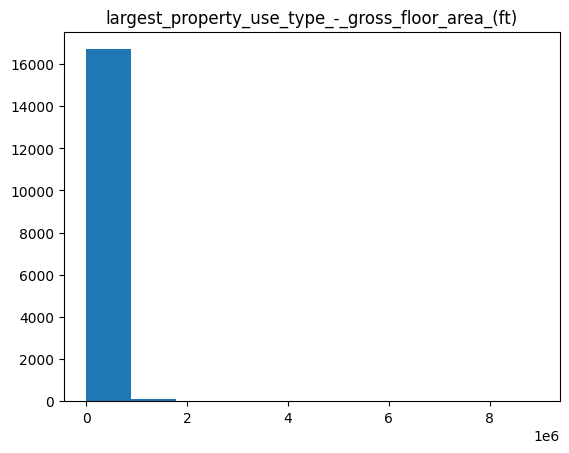

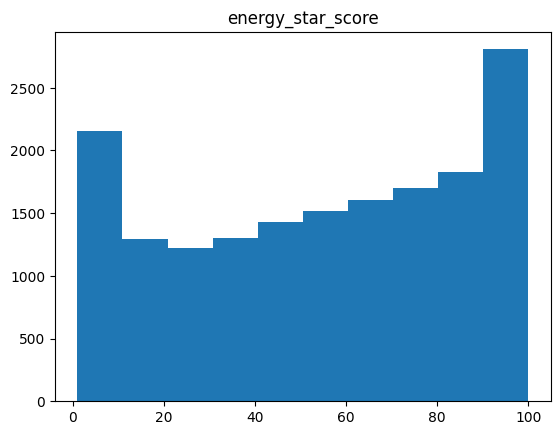

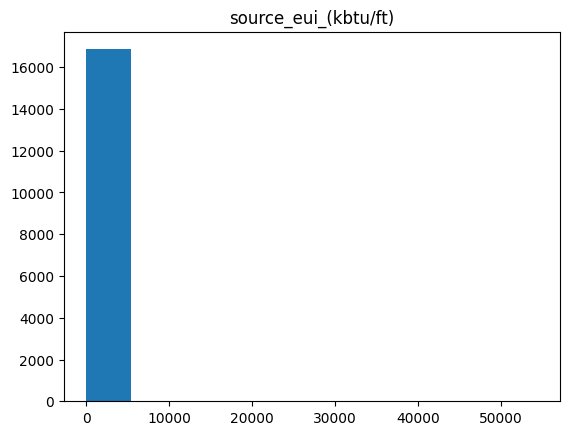

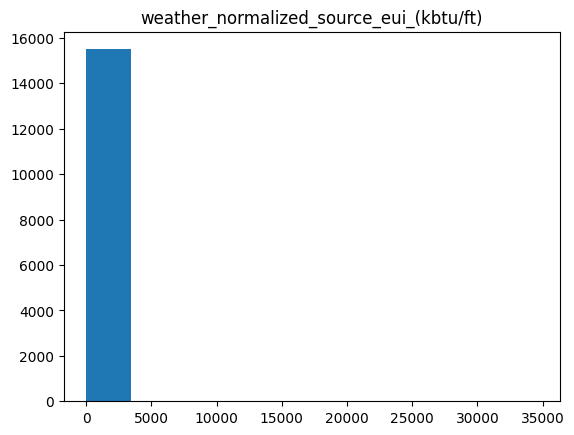

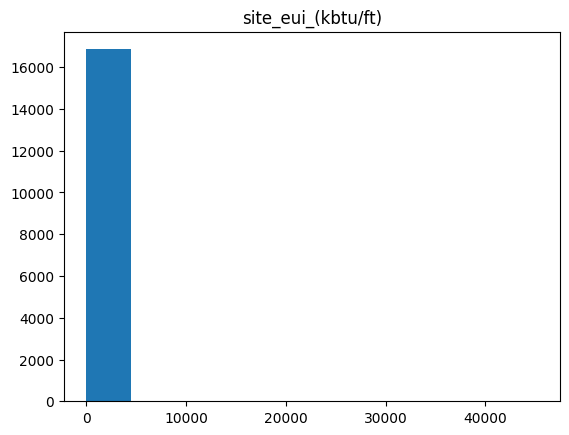

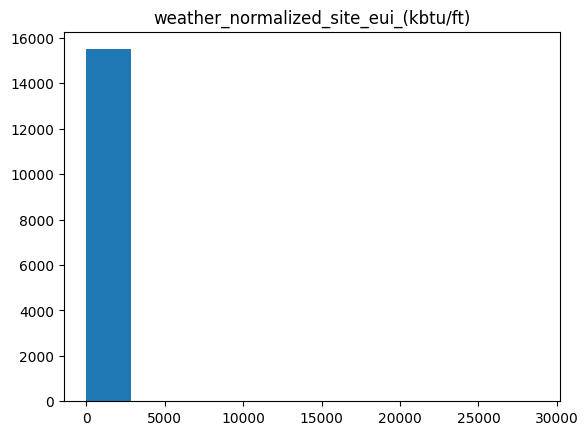

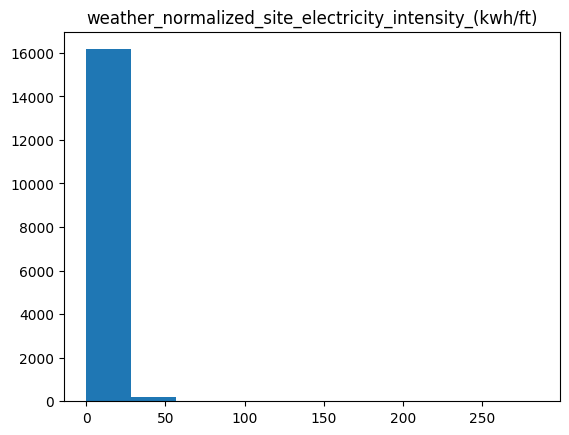

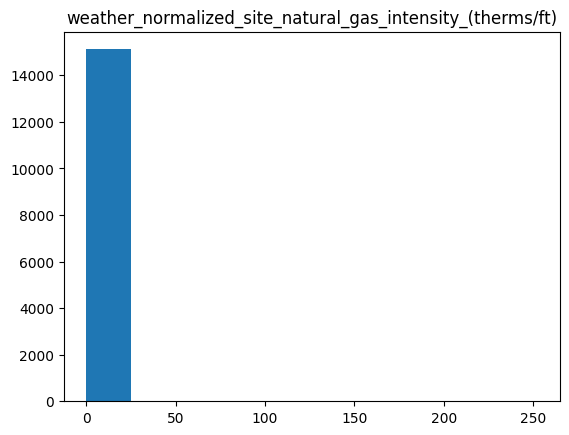

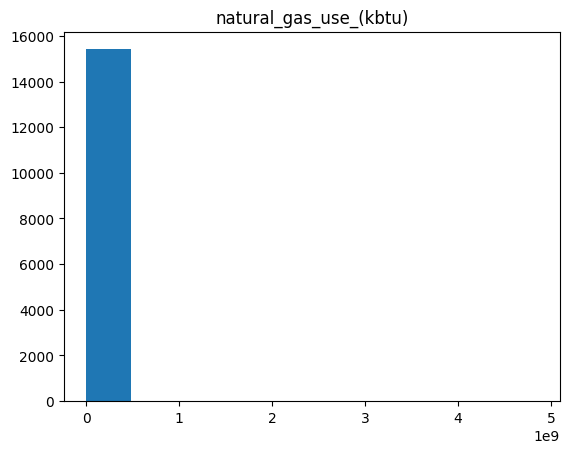

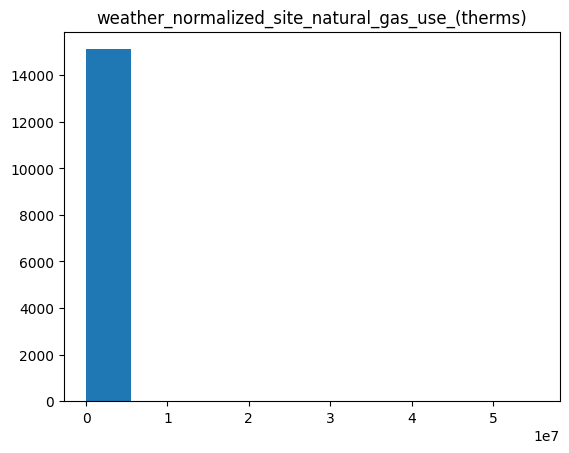

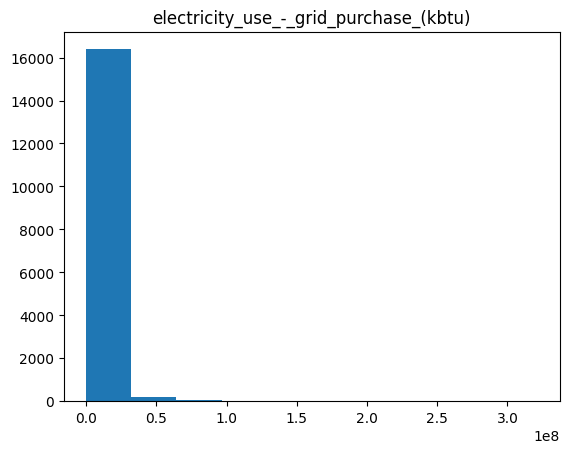

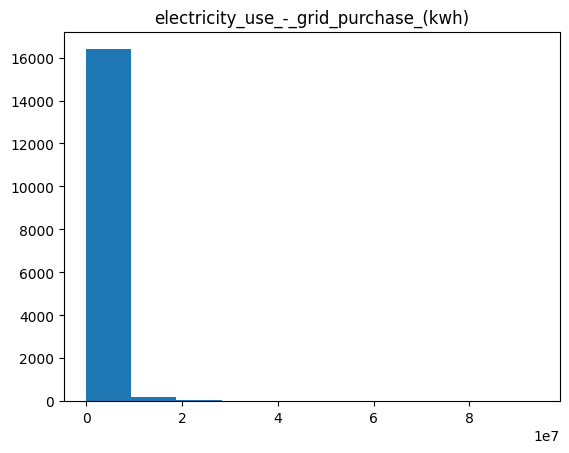

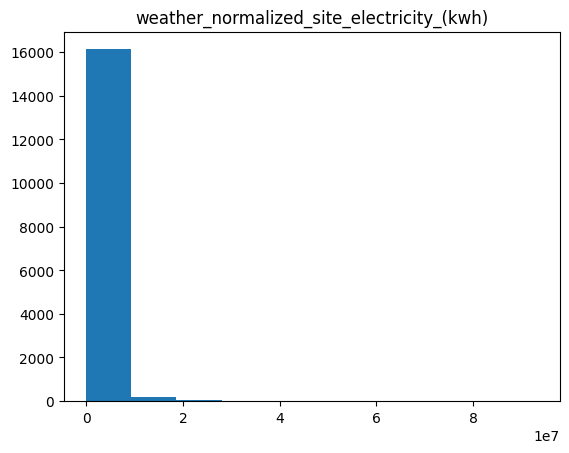

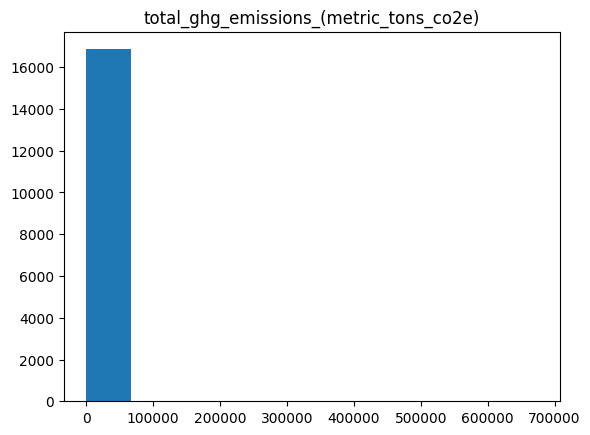

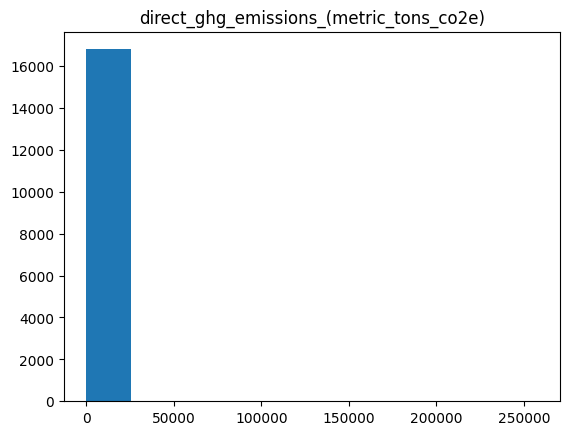

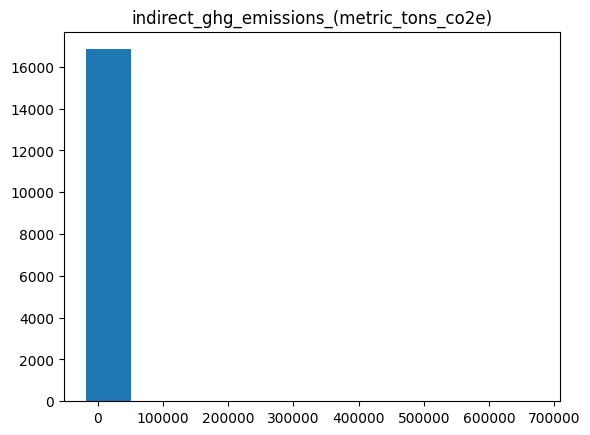

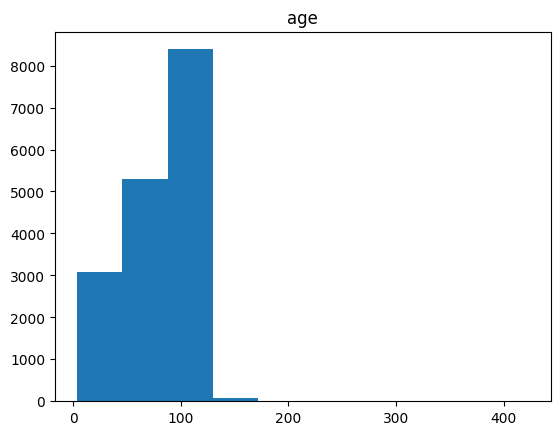

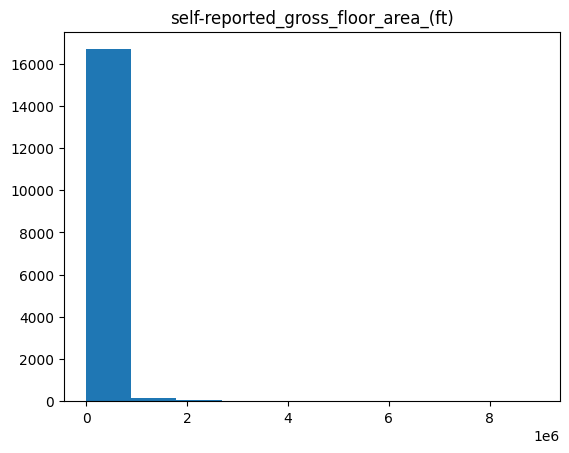

In [107]:
for col in numerical_columns:
    plt.hist(data_cleaned[col])
    plt.title(col)
    plt.show()

#### Categorical variables

In [100]:
categorical_variables = list(set(data_cleaned.columns)-set(numerical_columns))

In [110]:
for col in categorical_variables:
    print(col)
    print(data_cleaned[col].unique())

largest_property_use_type
['Office' 'K-12 School' 'Hotel' 'Distribution Center'
 'Non-Refrigerated Warehouse' 'Refrigerated Warehouse'
 'Multifamily Housing' 'Residence Hall/Dormitory' 'Senior Care Community'
 'Hospital (General Medical & Surgical)' 'Medical Office'
 'Financial Office' 'Worship Facility' 'Retail Store'
 'Supermarket/Grocery Store' 'Bank Branch' 'Parking' 'Data Center'
 'Courthouse' 'Wholesale Club/Supercenter']
address_1_(self-reported)
['224 West 57th St' '56-25 92nd Street' '1170 Broadway' ...
 '1116 Carroll Street' '3033 Brighton 13 Street' '465 Park Avenue']
primary_property_type_-_self_selected
['Office' 'K-12 School' 'Hotel' 'Distribution Center'
 'Refrigerated Warehouse' 'Multifamily Housing'
 'Non-Refrigerated Warehouse' 'Residence Hall/Dormitory'
 'Senior Care Community' 'Hospital (General Medical & Surgical)'
 'Medical Office' 'Financial Office' 'Worship Facility' 'Retail Store'
 'Other' 'Supermarket/Grocery Store' 'Fitness Center/Health Club/Gym'
 'Manufactu